In [1]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [2]:
product_descriptions = pd.read_csv('BigBasket Products.csv')
product_descriptions.shape

(27555, 12)

In [3]:
product_descriptions = product_descriptions.dropna()
product_descriptions.shape


(18840, 12)

In [4]:
product_descriptions.head()

,index,product_id,product_name,category,sub_category,brand,sale_price,market_price,type,user_id,rating,description
0,1,100001,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,2,4.1,This Product contains Garlic Oil that is known...
1,2,100002,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,8,2.3,"Each product is microwave safe (without lid), ..."
2,3,100003,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,11400,3.4,"A perfect gift for all occasions, be it your m..."
3,4,100004,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",11676,3.7,Multipurpose container with an attractive desi...
4,5,100005,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,41385,4.4,Nivea Creme Soft Soap gives your skin the best...


In [5]:
product_descriptions1 = product_descriptions.head(500)
# product_descriptions1.iloc[:,1]

product_descriptions1["product_name"].head(10)

0               Garlic Oil - Vegetarian Capsule 500 mg
1                                Water Bottle - Orange
2                       Brass Angle Deep - Plain, No.2
3    Cereal Flip Lid Container/Storage Jar - Assort...
4                   Creme Soft Soap - For Hands & Body
5                    Germ - Removal Multipurpose Wipes
6                                         Multani Mati
7                    Hand Sanitizer - 70% Alcohol Base
8    Biotin & Collagen Volumizing Hair Shampoo + Bi...
9                 Scrub Pad - Anti- Bacterial, Regular
Name: product_name, dtype: object

In [6]:
product_descriptions1["description"].shape


(500,)

In [7]:
# text_data = ["Welcome.", "To.", "Itsourcecode."]

# tfidf_vectorizer = TfidfVectorizer()
# tfidf_matrix = tfidf_vectorizer.fit_transform(text_data)

# vocabulary = tfidf_vectorizer.vocabulary_
# feature_names = list(vocabulary.keys())
# print(feature_names)

In [8]:
# vectorizer = TfidfVectorizer(stop_words='english')
# vectorizer = TfidfVectorizer()
# X1 = vectorizer.fit_transform(product_descriptions1["description"])
# X1

vectorizer = TfidfVectorizer(stop_words='english')

# Fit the TfidfVectorizer to your data
X1 = vectorizer.fit_transform(product_descriptions1["product_name"])




C:\Users\91638\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


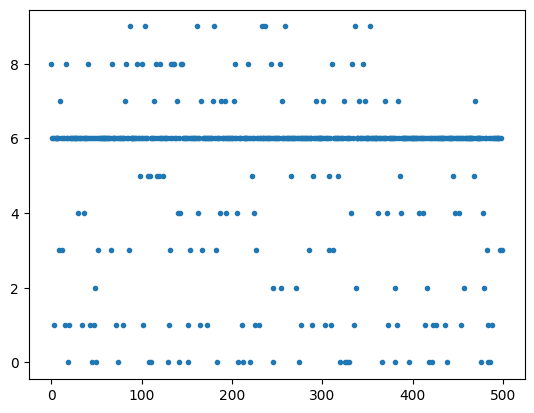

In [9]:
# Fitting K-Means to the dataset

X=X1

kmeans = KMeans(n_clusters = 10, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)
plt.plot(y_kmeans, ".")
plt.show()

In [24]:
# # Optimal clusters is 

# Create a TfidfVectorizer object


true_k = 10

model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X1)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]

#terms = vectorizer.get_feature_names()
# Access the feature names
feature_names = vectorizer.get_feature_names_out()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :5]:
        print(' %s' % feature_names[ind]),
    print

Top terms per cluster:
Cluster 0:
 assorted
 colour
 plastic
 spiderman
 container
Cluster 1:
 oil
 body
 control
 spray
 ylang
Cluster 2:
 honey
 sugar
 pure
 100
 sunflower
Cluster 3:
 steel
 glass
 stainless
 storage
 water
Cluster 4:
 green
 premium
 plastic
 tea
 container
Cluster 5:
 masala
 powder
 bar
 chocolate
 noodles
Cluster 6:
 soap
 bathing
 turmeric
 arisina
 pudi
Cluster 7:
 skin
 cream
 dry
 nomarks
 antimarks
Cluster 8:
 organic
 mix
 powder
 paneer
 rava
Cluster 9:
 milk
 fruit
 mango
 vanilla
 wonderz


In [25]:
print("Cluster ID:")
Y = vectorizer.transform(["oil"])
prediction = model.predict(Y)
print(prediction)

Cluster ID:
[1]


In [26]:
print("Cluster ID:")
Y = vectorizer.transform(["masala"])
prediction = model.predict(Y)
print(prediction)

Cluster ID:
[5]


In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

def show_recommendations(product):
    #print("Cluster ID:")
    Y = vectorizer.transform([product])
    prediction = model.predict(Y)
    #print(prediction)
    print_cluster(prediction[0])

In [4]:
show_recommendations("plastic")

NameError: name 'vectorizer' is not defined